# Download Sentinel-3 data from copernicus.eu

https://documentation.dataspace.copernicus.eu/APIs/openEO/Python_Client/Python.html

https://github.com/eu-cdse/notebook-samples/tree/main/openeo

In [1]:
#!pip install openeo

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
import numpy as np

In [86]:
import openeo

connection = openeo.connect("openeo.dataspace.copernicus.eu")

See: https://documentation.dataspace.copernicus.eu/APIs/openEO/Collections.html

In [87]:
connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

In [88]:
# List collections available on the openEO back-end
connection.list_collection_ids()

# Get detailed metadata of a certain collection
connection.describe_collection("SENTINEL2_L2A")
#connection.describe_collection("SENTINEL3_SLSTR")

#connection.describe_collection("SENTINEL3_SYN_L2_SYN")
#connection.describe_collection("SENTINEL3_OLCI_L1B")

{'assets': {'thumbnail': {'href': 'https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2022/07/tallinn_estonia/24383281-1-eng-GB/Tallinn_Estonia_pillars.jpg',
   'roles': ['thumbnail'],
   'title': 'Sentinel 2 L2A',
   'type': 'image/png'}},
 'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B8A',
    'B09',
    'B11',
    'B12',
    'WVP',
    'AOT',
    'SCL',
    'sunAzimuthAngles',
    'sunZenithAngles',
    'viewAzimuthMean',
    'viewZenithMean']},
  't': {'extent': ['2015-07-04T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-56, 83],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'}},
 'description': 'SENTINEL-2 is a wide-swath, high-resolution, multi-spectral imaging mission, supporting Copernicus Land Monitoring studies, including the monitoring of vegetation, soil and water cover, as well as observation of inland waterways and coastal areas. The SENTINEL-2 Multispectral Instrument (MSI) samples 13 spectral bands: four bands at 10 metres, six bands at 20 metres and three bands at 60 metres spatial resolution.\n The level 2A data is atmospherically corrected using Sen2Cor.',
 'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
  'temporal': {'interval': [['2015-07-04T00:00:00Z', None]]}},
 'id': 'SENTINEL2_L2A',
 'keywords': ['COPERNICUS',
  'ESA',
  'Orthoimagery',
  'Sentinel-2',
  'MSI',
  'Level-2A',
  'Radiometry',
  'Plant Resource',
  'TOC'],
 'license': 'proprietary',
 'links': [{'href': 'https://sentinels.copernicus.eu/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license',
   'type': 'application/pdf'},
  {'href': 'https://documentation.dataspace.copernicus.eu/Data/SentinelMissions/Sentinel2.html#sentinel-2-level-2a-top-of-canopy-toc',
   'rel': 'alternate',
   'type': 'application/html'},
  {'href': 'https://dataspace.copernicus.eu/browser/?zoom=11&lat=45.36638&lng=12.49832&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2F28b654e7-8912-4e59-9e58-85b58d768b3a&datasetId=S2

# Sentinel-2 scenes

21st Apr 2024:

https://apps.sentinel-hub.com/eo-browser/?zoom=9&lat=-22.08909&lng=113.27179&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbd86bcc0-f318-402b-a145-015f85b9427e&datasetId=S2L2A&fromTime=2024-04-21T00%3A00%3A00.000Z&toTime=2024-04-21T23%3A59%3A59.999Z&layerId=1_TRUE_COLOR&gain=7&gamma=0.4&demSource3D=%22MAPZEN%22

27th Jan 2024:

https://apps.sentinel-hub.com/eo-browser/?zoom=9&lat=-22.21391&lng=113.02734&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbd86bcc0-f318-402b-a145-015f85b9427e&datasetId=S2L2A&fromTime=2024-01-27T00%3A00%3A00.000Z&toTime=2024-01-27T23%3A59%3A59.999Z&layerId=2_FALSE_COLOR&gain=5.6&gamma=0.7&demSource3D=%22MAPZEN%22

14th October 2023:

https://apps.sentinel-hub.com/eo-browser/?zoom=9&lat=-22.44023&lng=113.29102&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbd86bcc0-f318-402b-a145-015f85b9427e&datasetId=S2L2A&fromTime=2023-10-14T00%3A00%3A00.000Z&toTime=2023-10-14T23%3A59%3A59.999Z&layerId=6-SWIR&gain=2&gamma=0.5&demSource3D=%22MAPZEN%22


4 September 2023:

https://apps.sentinel-hub.com/eo-browser/?zoom=10&lat=-22.27576&lng=113.62335&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbd86bcc0-f318-402b-a145-015f85b9427e&datasetId=S2L2A&fromTime=2023-09-04T00%3A00%3A00.000Z&toTime=2023-09-04T23%3A59%3A59.999Z&layerId=1_TRUE_COLOR&gain=0.5&gamma=0.5&demSource3D=%22MAPZEN%22

30 August 2023:

https://apps.sentinel-hub.com/eo-browser/?zoom=8&lat=-21.74164&lng=112.98889&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbd86bcc0-f318-402b-a145-015f85b9427e&datasetId=S2L2A&fromTime=2023-08-30T00%3A00%3A00.000Z&toTime=2023-08-30T23%3A59%3A59.999Z&layerId=2_FALSE_COLOR&gain=2.6&gamma=0.4&demSource3D=%22MAPZEN%22

10 August 2023:

https://apps.sentinel-hub.com/eo-browser/?zoom=9&lat=-21.83251&lng=113.2251&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbd86bcc0-f318-402b-a145-015f85b9427e&datasetId=S2L2A&fromTime=2023-08-10T00%3A00%3A00.000Z&toTime=2023-08-10T23%3A59%3A59.999Z&layerId=1_TRUE_COLOR&gain=2.6&gamma=0.4&demSource3D=%22MAPZEN%22



In [99]:
area = [113, -23, 114.5, -21.5] # Ningaloo
# t1,t2 = "2024-04-20", "2024-04-22"
# t1,t2 = "2024-01-26", "2024-01-29"
# t1,t2 = "2023-07-06", "2023-07-07"
t1,t2 = "2024-04-16", "2024-04-17"

datacube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent={"west": 113., "south": -23, "east": 114.5, "north": -21.5},
    temporal_extent = [t1,t2],
    bands=["B02"],
    #max_cloud_cover=100,
)

In [100]:
datacube

In [101]:
outfile = f'../DATA/Sentinel2_L2A_B02_{t1}.nc'
datacube.download(outfile)

In [102]:
ds = xr.open_dataset(outfile)
ds

<xarray.Dataset>
Dimensions:  (t: 1, x: 15771, y: 16900)
Coordinates:
  * t        (t) datetime64[ns] 2024-04-16
  * x        (x) float64 7.05e+05 7.05e+05 7.05e+05 ... 8.627e+05 8.627e+05
  * y        (y) float64 7.621e+06 7.621e+06 7.621e+06 ... 7.452e+06 7.452e+06
Data variables:
    crs      |S1 ...
    B02      (t, y, x) float32 ...
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

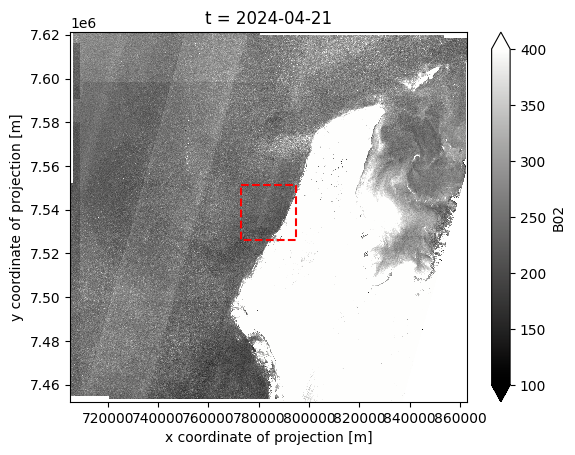

In [11]:
# t1 = "2023-07-06"
# t1 = "2024-04-16"
# vmin=50
# vmax=400

t1 = "2024-04-21"
vmin=100
vmax=400

# t1 = "2024-01-26"
# vmin=200
# vmax=900
# i1,i2 = 7800,8500
# j1,j2 = 8500,9200

# i1,i2 = 6000,8500 # Southern end
# j1,j2 = 8500,11000

i1,i2 = 6800,9000
j1,j2 = 7000,9500

# i1,i2 = 7500,9500
# j1,j2 = 5000,7500

# i1,i2 = 12200,13200
# j1,j2 = 2500,3500

outfile = f'../DATA/Sentinel2_L2A_B02_{t1}.nc'
ds = xr.open_dataset(outfile)

plt.figure()
ds['B02'].isel(t=0, x=slice(None,None, 5), y=slice(None,None,5)).plot.imshow(vmin=vmin, vmax=vmax, cmap="cmo.gray")

x = ds['x'].isel(x=[i1,i2])
y = ds['y'].isel(y=[j1,j2])
xbox = [x[0], x[1], x[1], x[0], x[0]]
ybox = [y[0], y[0], y[1], y[1], y[0]]

plt.plot(xbox, ybox, 'r--')

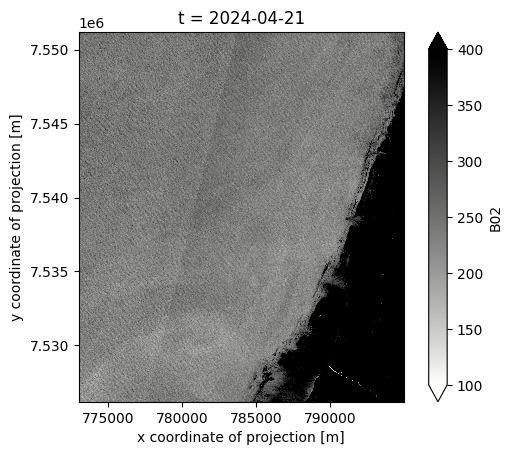

In [12]:
fig, ax = plt.subplots()
# ds['B02'].isel(t=0, x=slice(7500,8500, 1), y=slice(8000,9000,1)).plot.imshow(vmin=100, vmax=300, cmap="Blues")
ds['B02'].isel(t=0, x=slice(i1,i2, 1), y=slice(j1,j2,1)).plot.imshow(vmin=vmin, vmax=vmax, cmap="cmo.gray_r")

ax.set_aspect('equal')

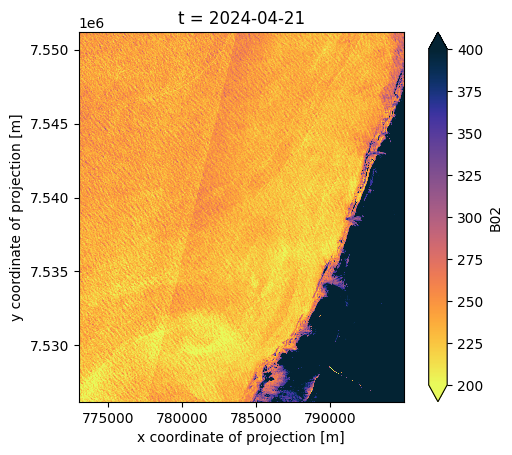

In [13]:
from scipy.signal import convolve2d
z2 = ds['B02'].isel(t=0, x=slice(i1,i2, 1), y=slice(j1,j2,1)).copy()
#z = ds_area['sigma0'].copy()

zc = z2.values#+1j
zc[np.isnan(zc)] = 0.
# zf,_,_,_ = filter2d(zc, 1, 1, 20, 0, 359.999, n=1)
# z[:] = np.abs(zf)

N=3
z2[:] = convolve2d(zc, np.ones((N,N))/N**2, mode='same')


fig, ax = plt.subplots()
# ds['B02'].isel(t=0, x=slice(7500,8500, 1), y=slice(8000,9000,1)).plot.imshow(vmin=100, vmax=300, cmap="Blues")
z2.plot.imshow(vmin=200, vmax=vmax, cmap="cmo.thermal_r")

ax.set_aspect('equal')

In [14]:

# z2 = ds['B02'].isel(t=0, x=slice(i1,i2, 1), y=slice(j1,j2,1)).copy()
# dx, dy = np.gradient(z)
# z2[:] = np.abs(dx+1j*dy)
# # z.plot.imshow(vmin=vmin, vmax=vmax, cmap="cmo.thermal")
# z2.plot.imshow(vmin=-10, vmax=10, cmap="cmo.gray_r", alpha=1)

# ax.set_aspect('equal')

<Figure size 640x480 with 0 Axes>

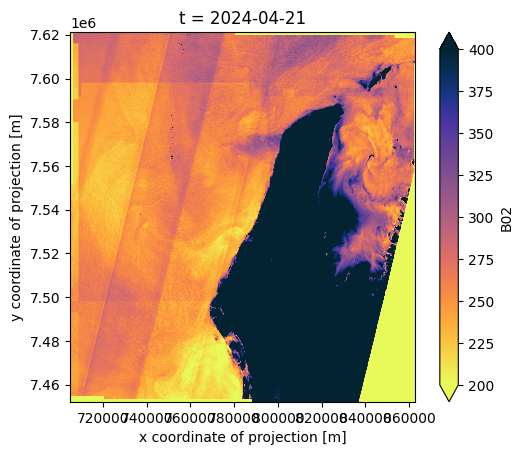

In [15]:
plt.figure()
z = ds['B02'].isel(t=0, x=slice(None,None, 5), y=slice(None,None,5)).copy()
#z = ds_area['sigma0'].copy()

zc = z.values#+1j
zc[np.isnan(zc)] = 0.
# zf,_,_,_ = filter2d(zc, 1, 1, 20, 0, 359.999, n=1)
# z[:] = np.abs(zf)

N=8
z[:] = convolve2d(zc, np.ones((N,N))/N**2, mode='same')

fig, ax = plt.subplots()
# ds['B02'].isel(t=0, x=slice(7500,8500, 1), y=slice(8000,9000,1)).plot.imshow(vmin=100, vmax=300, cmap="Blues")
z.plot.imshow(vmin=200, vmax=vmax, cmap="cmo.thermal_r")

ax.set_aspect('equal')

xbox = [x[0], x[1], x[1], x[0], x[0]]
ybox = [y[0], y[0], y[1], y[1], y[0]]

'../FIGURES/NingalooSentinel2_2024-04-21_Blues_r.png'

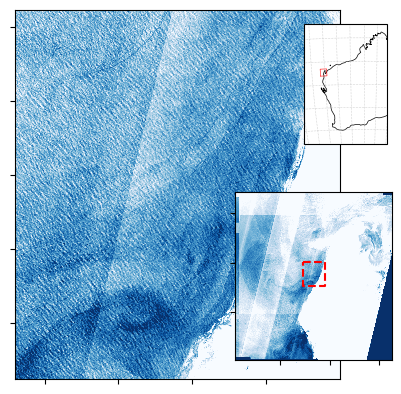

In [19]:
vmin =200
vmax = 275
import cartopy.crs as ccrs
cmap = "cmo.thermal_r"
# cmap = "bone_r"
cmap = "Blues_r"
fig = plt.figure()
z = ds['B02'].isel(t=0, x=slice(None,None, 5), y=slice(None,None,5)).copy()
#z = ds_area['sigma0'].copy()

zc = z.values#+1j
zc[np.isnan(zc)] = 0.
# zf,_,_,_ = filter2d(zc, 1, 1, 20, 0, 359.999, n=1)
# z[:] = np.abs(zf)

N=8
z[:] = convolve2d(zc, np.ones((N,N))/N**2, mode='same')


ax3=plt.subplot(111)

ax = fig.add_axes([0.55,0.15,0.35,0.35], )
# ds['B02'].isel(t=0, x=slice(7500,8500, 1), y=slice(8000,9000,1)).plot.imshow(vmin=100, vmax=300, cmap="Blues")
z.plot.imshow(vmin=vmin, vmax=vmax, cmap=cmap, add_colorbar=False)

ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
plt.plot(xbox, ybox, 'r--')
#plt.plot(113.93323333333333, -21.859933333333334,'md') # Nin 75 m

###
# Map inset
extent = [110,128,-38,-12]
mapproj = ccrs.Orthographic(123.0, -14)
ax2 = fig.add_axes([0.65,0.60,0.25,0.25], projection=mapproj)

ax2.gridlines(lw=0.4, ls=':')
ax2.coastlines(resolution='50m', lw=0.5)
#ax.fill(xybox[:,0],xybox[:,1],transform=mapproj)
#ax2.plot(0,0,'ro',transform=mapproj)

x1,y1,x2,y2 = [113, -23, 114.5, -21.5] # Ningaloo

xlims = [x1,x2]
ylims = [y1,y2]
xbox2 = [xlims[0], xlims[1],xlims[1], xlims[0], xlims[0]]
ybox2 = [ylims[0], ylims[0], ylims[1], ylims[1], ylims[0]]

ax2.plot(xbox2, ybox2,
         color='r', linewidth=0.4, marker='',
         transform=ccrs.Geodetic(), #remove this line to get straight lines
         )

ax2.set_extent(extent)

#ax3 = fig.add_axes([0.55,0.15,0.35,0.35], )
z2.plot.imshow(ax=ax3, vmin=vmin, vmax=vmax, cmap=cmap, add_colorbar=False)
ax3.set_aspect('equal')

ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_title('')
ax3.set_xlabel('')
ax3.set_ylabel('')

#plt.tight_layout()

outfile = f"../FIGURES/NingalooSentinel2_{t1}_{cmap}.png"
plt.savefig(outfile, dpi=150)
outfile